# How is the Theft Frequency in Baltimore Between 2011 - 2017 Affected by Temperature Fluctuations, Being Indoors/Outdoors, Variation in Districts, and Time of Day?


By Ryan Hu

February 2nd, 2023

## Introduction

In the state of Maryland, theft is legally defined as "A person commits theft in Maryland by taking someone else's property without authorization or by deceit and either intending to deprive the owner of their property, or willfully or knowingly using, concealing, or abandoning the property in a way that actually deprives the owner of their property" (CriminalDefenseLawyer - NOLO). This official definition is critical as this project aims to study the research question "How the Theft Frequency in Baltimore Between 2011 - 2017 is Affected by Temperature Fluctuations, Being Indoors/Outdoors, Variation in Districts, and Time of Day."

For this project, we have chosen to focus on theft-related crimes. It is a common conception that theft-related crimes tend to occur during later hours of the day when it is darker, in more dangerous districts, at normal human-operating temperatures, and typically in non-public settings. In order to examine this relationship, we utilize the variables of "Indoor", "District", and "CrimeTime" in the Crime in Baltimore dataset along with the variable "temp" in the Baltimore Historical Weather Report dataset as metrics for the explanatory variables. The project intends to study this relationship by merging both the Crime in Baltimore dataset from Kaggle and the Baltimore Historical Weather Report dataset from the weather API Visual Crossing into one dataset. Doing this will allow us to study the relationship by utilizing a count of dummy variables for "Theft" as an indicator of theft frequency as a dependent variable (dependent y-variable), and the variables of "temp", "Indoor", "District", and "CrimeTime" as four explanatory variables (independent x-variables).

The source of the Crime in Baltimore dataset is the highly reputable Uniform Crime Reporting Program (UCRP) found on the FBI's official government website, eventually transferred onto Kaggle. The source of the Baltimore Historical Weather Report dataset is one of the world's top weather APIs: Visual Crossing.

To briefly summarize the findings of the project, there is indeed interesting correlation between the dependent and independent variables. Most thefts occurred around room temperature, in outdoor settings, in the Northeastern and Southeastern districts, and around night time. Whether these correlations are significant or not will be further explored by the following summary statistics tables and graphs below.


In [3]:
import pandas as pd # Importing the pandas package
import numpy as np # Importing the numpy package
import matplotlib.pyplot as plt # Importing the matplotlib.pyplot package
import datetime as dt # Importing the datetime package

Importing the pandas, numpy, matplotlib.pyplot, and datetime packages for the project.

## File Reading

In [4]:
url = "/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Datasets/BPD_Part_1_Victim_Based_Crime_Data.csv"
df = pd.read_csv(url) # Reading the crime in Baltimore CSV file from Kaggle

In [5]:
url = "/Users/rhu.2002/Library/Mobile Documents/com~apple~CloudDocs/Education/University of Toronto/Junior Year Courses/ECO225/Datasets/Historical_Weather_Data_for_Baltimore_MD.csv"
df_weather = pd.read_csv(url) # Reading the Baltimore historical weather report CSV file from weather API

Reading the Crime in Baltimore and Baltimore Historical Weather Report files into Jupyter. Baltimore Historical Weather Report is an additional dataset acquired from the Visual Crossing weather API.

## Dummy Variables

In [6]:
df['Theft'] = [int(x in ('AUTO THEFT', 'Burglarly', 'LARCENY', 'LARCENY FROM AUTO',
                         'ROBBERY - CARJACKING', 'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE',
                         'ROBBERY - STREET')) for x in df['Description']] # Create a new column theft with dummy variables for each crime
df['Indoor'] = [int(x in ('I', 'Inside')) for x in df['Inside/Outside']] # Create a new column indoor with dummy variables for each crime

Creating new dummy variable columns for Theft and Indoor. In the Theft column, dummy variable 1 represents a theft crime, and dummy variable 0 represents a non-theft crime. In the Indoor column, dummy variable 1 represents an indoor crime, and dummy variable 0 represents an outdoor crime.

## Date Parsing

In [7]:
df['CrimeDate'] = pd.to_datetime(df.CrimeDate, format = '%m/%d/%y') # Split up date format
df['Month'] = df['CrimeDate'].dt.month # Create new column for month and add each month
df['Day'] = df['CrimeDate'].dt.day # Create new column for day and add each day
df['Year'] = df['CrimeDate'].dt.year # Create new column for year and add each year

In [8]:
df_weather['datetime'] = pd.to_datetime(df_weather.datetime, format = '%m/%d/%y') # Split up date format
df_weather['Month'] = df_weather['datetime'].dt.month # Create new column for month and add each month
df_weather['Day'] = df_weather['datetime'].dt.day # Create new column for day and add each day
df_weather['Year'] = df_weather['datetime'].dt.year # Create new column for year and add each year

For both DataFrames, parsing the date by splitting it up on month, day, and year. Then creating new month, day, and year columns and extracting the respective information from the CrimeDate and datetime column.

## Merging DataFames

In [9]:
df_merge = pd.merge(df, df_weather, on=['Month', 'Day', 'Year']) # Merge the crime and weather dataframe on month, day, and year

Merging the Crime in Baltimore and Baltimore Historical Weather Report dataframes on the newly shared columns of month, day, and year. 

## Data Cleaning

In [10]:
df_total = df_merge[['CrimeDate', 'CrimeTime', 'District', 'temp', 'Theft', 'Indoor']] # Filter the merged dataframe to include only relevant columns
df_total = df_total.dropna(how='any', axis=0) # Clean the merged dataframe by dropping all empty observations
df_total # Present the new cleaned dataframe

,CrimeDate,CrimeTime,District,temp,Theft,Indoor
0,2017-09-01,23:49:00,NORTHWESTERN,64.0,0,1
1,2017-09-01,23:48:00,WESTERN,64.0,1,0
2,2017-09-01,23:30:00,SOUTHEASTERN,64.0,1,0
3,2017-09-01,23:30:00,CENTRAL,64.0,1,0
4,2017-09-01,22:30:00,SOUTHEASTERN,64.0,1,1
...,...,...,...,...,...,...
276455,2012-01-01,0:00:00,SOUTHWESTERN,46.3,1,1
276456,2012-01-01,0:00:00,NORTHEASTERN,46.3,1,0
276457,2012-01-01,0:00:00,EASTERN,46.3,1,0
276458,2012-01-01,0:00:00,NORTHEASTERN,46.3,0,1


Filtering the newly merged dataframe to only contain column variables that are relevant. Dropping all empty observations and then presenting the cleaned dataframe.

## Summary Statistics Tables

In [11]:
df_total['Theft'].describe() # Summary statistics for theft frequency among all crimes - dependent variable

count    276380.000000
mean          0.542062
std           0.498229
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Theft, dtype: float64

The summary statistics table for theft frequency among all 276,380 crimes is presented. In this context, the mean represents the proportion of crimes that are theft. Hence, 54.2062% of all crimes were theft-related. The 50th percentile median is 1.0, representing the dummy for a theft-related crime. This means that there are more theft-related crimes than non-theft related crimes. For my research, the mean suggests that theft crimes are more prevalent than non-theft crimes.

In [12]:
df_total[df_total['Theft'] == 1.0]['temp'].describe() # Summary statistics for temperature in Farenheit among all thefts - independent variable

count    149815.000000
mean         58.659896
std          16.763435
min           9.500000
25%          44.900000
50%          60.400000
75%          73.600000
max          91.300000
Name: temp, dtype: float64

The summary statistics table for temperature among all 149,815 theft-related crimes is presented. As observed, the average temperature for all theft-related crimes was 58.659896 degrees Farenheit. The minimum temperature recorded during a theft-related crime was 9.5 degrees Farenheit. The maximum temperature recorded during a theft-related crime was 91.3 degrees Farenheit. Notably, the 50th percentile median is slightly higher than the mean, signifying the data is skewed towards the left tail. For my research, this suggests that thefts typically occur more frequently during colder temperatures.

In [13]:
df_total[df_total['Theft'] == 1.0]['Indoor'].describe() # Summary statistics for indoor observations among all thefts - independent variable

count    149815.000000
mean          0.318693
std           0.465971
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Indoor, dtype: float64

The summary statistics table for indoor status among all 149,815 theft-related crimes is presented. According to the table, the average mean is 0.318693, representing that 31.8693% of theft-related crimes occured indoors. The 50th percentile median is 0.0, representing the dummy for an outdoor theft. This means that there are more outdoor thefts than indoor thefts. For my research, this suggests that the chance of theft occuring is more likely outdoors than indoors.

In [14]:
df_total[df_total['Theft'] == 1.0]['District'].describe() # Summary statistics for districts among all thefts - independent variable

count           149815
unique               9
top       NORTHEASTERN
freq             22815
Name: District, dtype: object

The summary statistics table for districts among all 149,815 theft-related crimes is presented. As depicted, the top district with the most theft-related crimes was Northeastern with 22,815 recorded thefts. Through a simple calculation, we can see that the district Northeastern was responsible for about 15% of all thefts. This proportion seems large as the data depicts that there are nine distinct districts in Baltimore where all instances of theft occured. For my research, this suggests that Northeastern is the district that is most prone to theft.

In [15]:
df_total[df_total['Theft'] == 1.0]['CrimeTime'].describe() # Summary statistics for time of day among all thefts - independent variable

count       149815
unique        1440
top       18:00:00
freq          4642
Name: CrimeTime, dtype: object

The summary statistics table for time among all 149,815 theft-related crimes is presented. There are 1440 unique time instances, thus showing that theft-related crimes spanned across all hours of the day. The data portrays that the most frequent time of day for theft-related crimes is 6 PM EST. Thefts that happened at this time summed up to 4,642 instances, representing about 3% of all thefts. This table supports the widely accepted notion that theft-related crimes are more likely to happen later at night when it is dark and less visible. For my research, this suggests that there are more observations of theft-related crimes during the night hours due to the absence of the sun reducing lighting, making it easier to execute theft.

## Plots, Histograms, and Figures

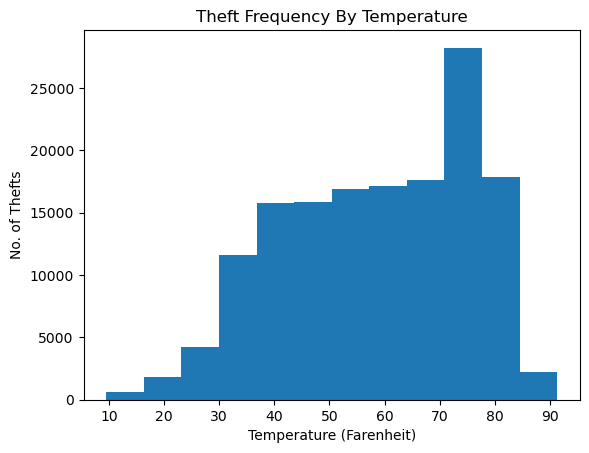

In [16]:
x = df_total[df_total['Theft'] == 1]['temp'] # Making a column with all temperatures where theft happened
plt.hist(x, bins = 12) # Making the histogram 
plt.xlabel('Temperature (Farenheit)') # Labeling the x-axis
plt.ylabel('No. of Thefts') # Labeling the y-axis
plt.title('Theft Frequency By Temperature') # Titling the graph
plt.show() # Presenting the Theft Frequency By Temperature histogram

In this first histogram, we can see the relationship between the number of thefts and temperature in the unit of Farenheit. The reason that this relationship is best depicted in a histogram is because of the continuous nature of the temperature data. We want to study and see if thefts occur at normal levels in extremely hot and cold settings.

As we can visually tell, the number of thefts drops significantly at both tails of the data, suggesting that extremely hot and cold environments discourage theft from occuring. This could be attested to the fact that thieves do not want to conduct theft in unconfortable temperatures, especially when most thefts take place outside. Additionally, there is the possibility that the sample of days with extremely hot and cold temperatures is limited, thus granting less opportunity for theft to occur. We can see a large spike in the number of thefts between 70 and 80 degrees Farenheit, showing a higher tendency for the execution of a theft around room temperature: 68 degrees Farenheit. 

As a result, we can conclude that there is a correlation between temperature and theft frequency, further enhancing the research question. Whether this correlation depends on if thieves base their theft-decisions on comfortable temperatures or the number of available days at certain temperatures remains ambiguous and open to further research.

In [17]:
df_total['hour'] = df_total['CrimeTime'].str.split(':').str[0] # Slicing everything up until the first colon in column CrimeTime
df_total['hour'] = df_total['hour'].astype('int') # Converting the hour column from string to integer
by_hour = df_total.groupby(['hour']).sum() # Grouping by the hour to count thefts per hour
by_hour = by_hour.reset_index() # Resetting the index back to default

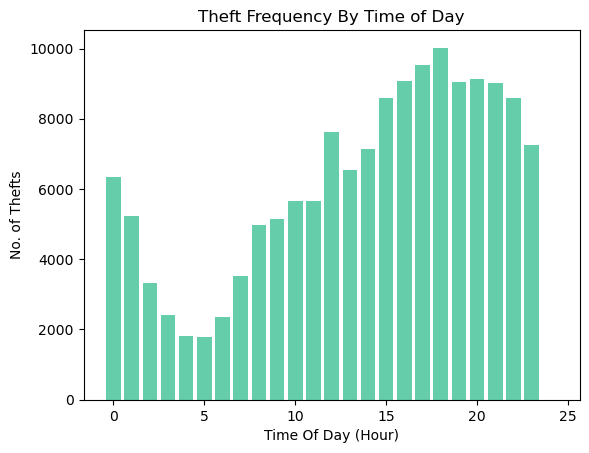

In [18]:
by_hour = by_hour.loc[by_hour['hour'] != '24'] # Getting rid of the singular row where the time is 24
plt.bar(by_hour['hour'], by_hour['Theft'], color = 'mediumaquamarine') # Making the bar chart
plt.xlabel('Time Of Day (Hour)') # Labeling the x-axis
plt.ylabel('No. of Thefts') # Labeling the y-axis
plt.title('Theft Frequency By Time of Day') # Titling the graph
plt.bar(by_hour['hour'], by_hour['Theft'], color = 'mediumaquamarine') # Making the bar chart
plt.show() # Presenting the Theft Frequency By Time of Day bar chart
# ASK TA: How to order the x-axis by changing the hour column from string to integer (integer will sort itself)?

In this bar chart, we can see the relationship of the hourly number of thefts over the course of the six years. To account for all six years, the data is grouped by hour to accumulate all the thefts that occured in a specific hour. A bar chart is an optimal graph choice for this relationship because it allows us to simultaneously analyze all 24 hours of the day and their theft frequency levels.

The highest theft frequency starts to peak around late afternoon and early evening. This bolsters the widely accepted logic that thefts typically occur during darker hours when there is less prominent lighting and ability to clearly see the scene. Reinforcing this rationale, we can clearly see that the lowest number of thefts occured between the hours of 3 to 7 AM EST. During this time, the sun normally rises - depending a little on the time of the year - shining bright light, potentially discouraging thefts due to clearer vision of the situation. Additionally, this could also be caused by the fact that people, including thieves, are normally sleeping during these hours.

In regards to the research question, this chart supports the notion that thefts are more likely to occur during later hours of the day when the sun has gone down.

In [19]:
df_total['month'] = pd.DatetimeIndex(df_total['CrimeDate']).month # Creating new column month with all months from CrimeDate

In [20]:
indoor_thefts = df_total.loc[df_total['Indoor'] == 1] # Filtering for indoor thefts
indoor_thefts_month = indoor_thefts.groupby(['month']).sum() # Summing up the total indoor thefts per month
indoor_thefts_month = indoor_thefts_month.reset_index() # Resetting index back to default
outdoor_thefts = df_total.loc[df_total['Indoor'] == 0] # Filtering for outdoor thefts
outdoor_thefts_month = outdoor_thefts.groupby(['month']).sum() # Summing up the total outdoor thefts per month
outdoor_thefts_month = outdoor_thefts_month.reset_index() # Resetting index back to default

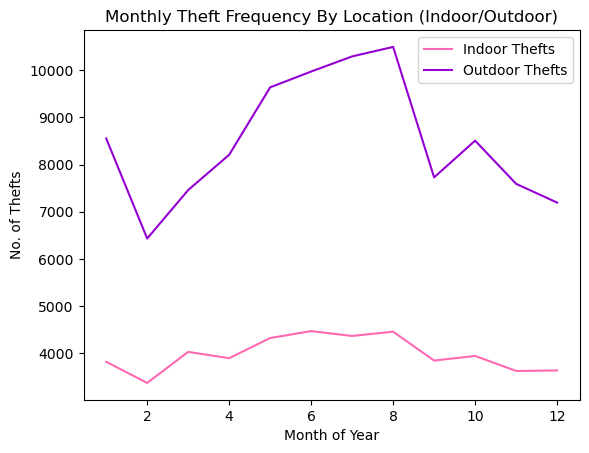

In [21]:
plt.plot(indoor_thefts_month['month'], indoor_thefts_month['Theft'], label = "Indoor Thefts", color ='hotpink') # Graphing the indoor thefts line 
plt.plot(outdoor_thefts_month['month'], outdoor_thefts_month['Theft'], label = "Outdoor Thefts", color = 'darkviolet') # Graphing the outdoor thefts line
plt.xlabel("Month of Year") # Labeling the x-axis
plt.ylabel("No. of Thefts") # Labeling the y-axis
plt.title("Monthly Theft Frequency By Location (Indoor/Outdoor)") # Titling the graph
plt.legend(loc = 'upper right', prop = {'size': 10}) # Adjusting the legend to fit the graph
plt.show() # Presenting the Monthly Theft Frequency By Location (Indoor/Outdoor) line chart

The line chart above depicts the relationship between the number of thefts and the month of the year that they occur in for both indoor and outdoor thefts. As distinguished by the legend in the top right, indoor thefts are pink and outdoor thefts are purple. We can see that the frequency of indoor thefts is much lower than that of outdoor thefts for all months of the year. The thefts in the dataset are very heavily automobile focused. Oftentimes, vehicles are parked outside either in an open parking lot or driveway. The exposure to the world makes it much easier to steal sub-parts of vehicles, or even the whole vehicle itself. To this end, the significantly higher frequency for outdoor thefts along with lower levels of indoor theft could be due to the heavy involvement of vehicles during theft.

Interestingly enough, there is a large decrease in thefts for the winter months, especially February. Once again, this can be attested to our claim that colder temperatures in the winter discourage outdoor theft from happening due to the exposure to the weather. Contrarily, the theft frequency also starts to rise in the summer months. This aligns with our belief that relatively warmer temperatures present more theft opportunity. Although extremely hot temperatures discourage theft, Baltimore is a maritime climate that does not experience frequently unbearable heat during most summers.

So what do these patterns tell us? They simply reinforce our research question by accentuating the association that temperature and indoor/outdoor locations have with levels of theft.

In [22]:
grouped = df_total.groupby(['District', 'Indoor']).sum() # Grouping by district and indoor/outdoor to count how many indoor and outdoor thefts per district
grouped.drop(columns = ['temp', 'month'], inplace = True) # Dropping the temp and month columns
grouped = grouped.reset_index() # Resetting index back to default

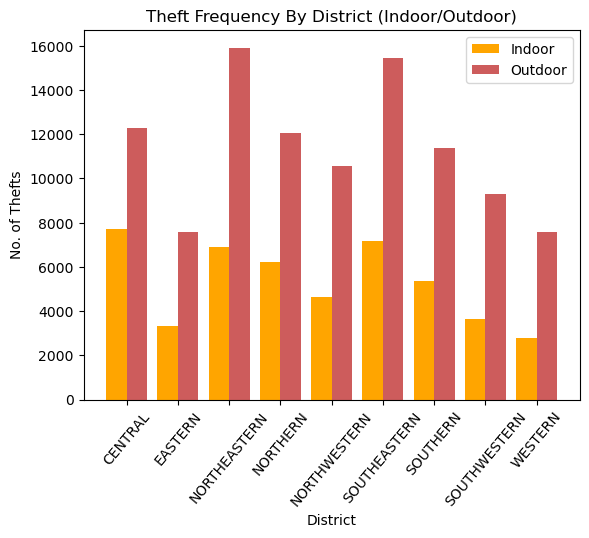

In [23]:
labels = list(grouped['District'].unique()) # Making a list of unique districts
indoor = list(np.array(grouped.loc[grouped['Indoor'] == 1]['Theft'])) # Making a list of all indoor thefts
outdoor = list(np.array(grouped.loc[grouped['Indoor'] == 0]['Theft'])) # Making a list of all outdoor thefts

x = np.arange(9) # Assigning a variable to range through all districts
width = 0.4 # Setting bar width
  
# Plotting data in grouped manner of indoor/outdoor bar type
plt.bar(x - width/2, indoor, width, color='orange') # Making indoor theft bars
plt.bar(x + width/2, outdoor, width, color='indianred') # Making outdoor theft bars
plt.xticks(x, labels, rotation = 50) # Rotating the district labels to fit x-axis 
plt.xlabel("District") # Labeling the x-axis
plt.ylabel("No. of Thefts") # Labeling the y-axis
plt.title("Theft Frequency By District (Indoor/Outdoor)") # Titling the graph
plt.legend(['Indoor', 'Outdoor']) # Making the legend
plt.show() # Presenting the Theft Frequency By District (Indoor/Outdoor) bar chart

The bar chart above distinguishes the difference between indoor and outdoor when studying the relationship of the number of thefts and the district of occurence. By grouping the data on both indoor/outdoor and district, we can see the relationship between the variables all at once. The legend in the top right distinguishes that indoor thefts are orange and outdoor thefts are red. In every district, it is apparent that the number of outdoor thefts is higher than the number of indoor thefts by a noticeable margin. Once again, this can be related back to our logic that thefts in this dataset occur more outdoors, possibly due to the heavy proportion of thefts involving vehicles or vehicle parts.

Danger wise, Northeastern is the district most prone to aggregate theft at almost 16,000 recorded thefts, supporting our findings from the respective summary statistics table above. Southeastern also shows high levels of both types of thefts, reaching levels just around the Northeastern district. It is also important to note that the Central district has the highest number of indoor thefts reaching just below 8,000, but this level is very comparable to that offered by the Northeastern and Southeastern districts.

In terms of safety, the Eastern and Western parts of Baltimore experience lower levels of outdoor theft at approximately  8,000 recorded instances and indoor theft at around the 3,000 level. This could be attested to the presence of more suburbs on the Eastern and Western parts of Baltimore or differences in population density across districts.

Supporting the research question, these patterns suggest that outdoor areas are more susceptible to theft in the highest risk districts of Northeastern and Southeastern. The trend of outdoor locations being more susceptible to theft holds true for the Eastern and Western districts, but these districts are all around safer as well.

In [24]:
thefts = df_total.loc[df_total['Theft'] == 1] # Filtering for only thefts
thefts_by_district = thefts.groupby(['District']).sum() # Summing up the total amount of thefts per district
thefts_by_district.drop(columns = ['temp', 'month', 'Indoor'], inplace = True) # Dropping irrelevant variables
thefts_by_district = thefts_by_district.reset_index() # Resetting the index back to default

In [25]:
temps = thefts.groupby(['District']).mean() # Getting the averages for all variables per district
temps.drop(columns = ['Theft', 'month', 'Indoor'], inplace = True) # Dropping irrelevant variables
temps = temps.reset_index() # Resetting the index back to default
districts = thefts_by_district['District'] # Getting a list of all nine districts
thefts = thefts_by_district['Theft'] # Getting a list of the number of thefts indexed on district
temp_values = temps['temp'] # Getting a list of all temperatures indexed on district

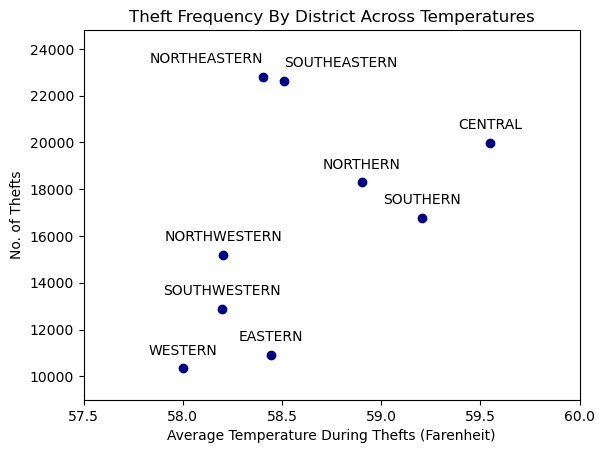

In [26]:
# Creating the scatterplot
fig, ax = plt.subplots()
ax.scatter(temp_values, thefts, color = 'navy')

# For looping through to determine where the distict labels are set relative to the point
for i, txt in enumerate(districts):
    if txt == 'SOUTHEASTERN': 
      ax.annotate(txt, (temp_values[i], thefts[i]), ha='left', textcoords="offset points", xytext=(0,10))

    elif txt == 'NORTHEASTERN': 
      ax.annotate(txt, (temp_values[i], thefts[i]), ha='right', textcoords="offset points", xytext=(0,10))

    else:
      ax.annotate(txt, (temp_values[i], thefts[i]), ha='center', textcoords="offset points", xytext=(0,10))

plt.xlabel("Average Temperature During Thefts (Farenheit)") # Labeling the x-axis
plt.ylabel("No. of Thefts") # Labeling the y-axis
plt.title('Theft Frequency By District Across Temperatures') # Titling the graph
plt.ylim(9000,24800) # Setting the range of the y-axis
plt.xlim(57.5,60) # Setting the range of the x-axis
plt.show() # Presenting the Theft Frequency By District Across Temperatures scatterplot

In the scatterplot above, we can observe the relationship between the number of thefts and each respective district across a limited range of temperatures. Right away, we can tell that magnitude of variation in the temperature x-axis is negligible, inferring that theft does not vary across temperatures between districts much.

Next, the scatterplot does a good job at depicting the higher and lower outliers. In terms of total aggregate theft (indoors and outdoors), the Northeastern and Southeastern districts reached astronimical levels at just about 23,000 recorded thefts. On the other hand, the Western and Eastern districts showed the polar opposite by totaling agregate thefts out to only roughly 11,000 recorded instances. 

How does this further the research question you may ask? The scatterplot data instates that there is little temperature variation during crimes across districts by really emphasizing on the insignificance of this relationship through the narrow x-axis. It also shows us the districts with the most (Northeastern and Southeastern) and least (Western and Eastern) total theft.

## Conclusion

In conclusion, there is a correlation between theft frequency and temperature, indoor/outdoor locations, districts, and time of crime. More extreme temperatures - both hot and cold - tend to discourage theft, along with having less eligible days for theft. Outdoor thefts have prominence over indoor thefts, potentially due to automobile related thefts dominating the dataset. The most dangerous districts for both indoor and outdoor theft were Northeastern and Southeastern, with the safest districts being Eastern and Western. The temperature variation during thefts across districts was negligible due to the insignificant differences in Farenheit. Theft levels started to rise and peak during night hours and sunset, whereas they started to bottom out during early hours of the day accompanied by sunrise.

Although many of the conclusions formed seem intuitive, it is important to be cautious of the possibility of endogeneity bias and ommitted variable bias. For instance, the low theft levels during hot and cold temperatures could simply be due to only a few days of each year reaching those apex and bottom temperature levels, but this rationale is not easily captured by the graph. Without the use of regression, instrumental variables, or any empirical analysis tools at this time, we can only conclude correlation and not causation.

To that end, the research question remains open to further advancements through empirical and statistical tools to further prove causation. The next section will highlight future steps for this research project.


## Future Steps

Future steps in this project could include and are not limited to the addition of empirical and statistical tools such as standard multiple regression, instrumental variables, differences-in-differences, regression discontinuity, and more. Furthermore, it could be beneficial to incorporate a map of Baltimore with indications of dangerous districts and other variables through the usage of GIS Mapping. This would provide additional data visualization insight that could build on the research question and relationship of variables introduced in this first project.

## Works Cited

“Crime/Law Enforcement Stats (UCR Program).” n.d. Federal Bureau of Investigation. https://www.fbi.gov/how-we-can-help-you/more-fbi-services-and-information/ucr.


Dane, Sohier. 2018. Review of "Crime in Baltimore". Edited by Sohier Dane. Crime Data for 2012 - 2017, February. https://www.kaggle.com/datasets/sohier/crime-in-baltimore.


“Maryland Misdemeanor and Felony Theft and Shoplifting Laws.” n.d. Www.criminaldefenselawyer.com. https://www.criminaldefenselawyer.com/resources/criminal-defense/crime-penalties/petty-theft-maryland-penalties-defense#:~:text=A%20person%20commits%20theft%20in.